In [27]:
import pandas as pd
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [30]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
telco_data.shape

(7043, 21)

In [32]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
telco_data.dtypes
telco_data.drop(columns= 'customerID', inplace = True)

In [34]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors = 'coerce')
#converting it to continuous as dtype was object

In [35]:
telco_continuous = telco_data.select_dtypes (include = ['int64','float64'])
telco_continuous.head()
telco_continuous.drop (columns = ['SeniorCitizen'],inplace = True)


In [36]:
cont_var = list (telco_continuous)

In [37]:
cont_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [38]:
telco_continuous

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


# 2.1

Text(0.5, 1.0, 'Target - Churn')

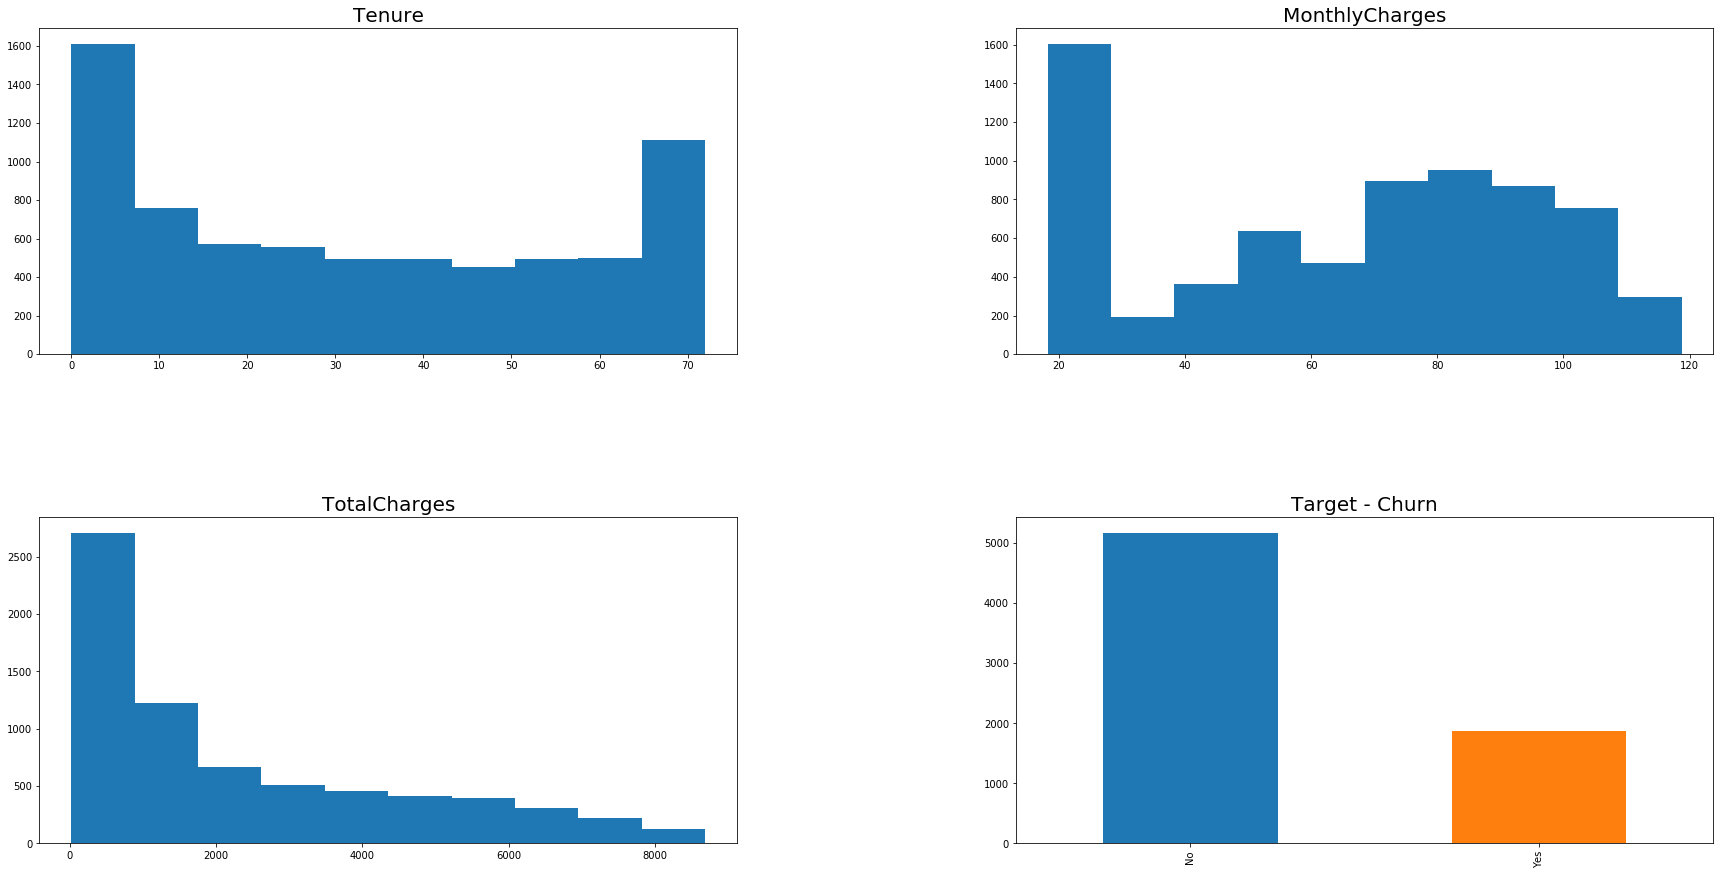

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
plt.subplots_adjust(wspace=0.40,hspace=0.50)

ax[0,0].hist(telco_continuous['tenure'])
ax[0,1].hist(telco_continuous['MonthlyCharges'])
ax[1,0].hist(telco_continuous['TotalCharges'])

telco_data['Churn'].value_counts().plot(kind='bar', ax=ax[1,1])  

ax[0,0].set_title('Tenure', fontsize = 20)
ax[0,1].set_title('MonthlyCharges', fontsize = 20)
ax[1,0].set_title('TotalCharges', fontsize = 20)
ax[1,1].set_title('Target - Churn', fontsize = 20)

# 2.2

In [40]:
cat_var = list(set(telco_data.columns)- set(telco_continuous.columns))

In [41]:
cat_var

['StreamingTV',
 'TechSupport',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'Contract',
 'Dependents',
 'OnlineBackup',
 'Partner',
 'MultipleLines',
 'InternetService',
 'Churn',
 'DeviceProtection',
 'PaperlessBilling',
 'OnlineSecurity',
 'StreamingMovies',
 'gender']

In [42]:
from sklearn.model_selection import train_test_split
cat_var.remove('Churn')
X_train, X_test, y_train, y_test = train_test_split (telco_data.loc[:, telco_data.columns != 'Churn'],telco_data['Churn'], random_state = 0)
X_train = pd.concat((X_train[cat_var], X_train[cont_var]), axis=1)

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


cat_pipe = ColumnTransformer([('imputer', SimpleImputer(strategy = 'median'), cont_var) , ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_var)], remainder='passthrough')


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg_model = make_pipeline(cat_pipe, LogisticRegression())
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=10)
print('Logistic Regression: ', np.mean(logreg_scores))


from sklearn.svm import LinearSVC
linearSVC_model = make_pipeline(cat_pipe, LinearSVC())
linearSVC_scores = cross_val_score (linearSVC_model,X_train, y_train, cv=10)
print('Linear SVC: ', np.mean(linearSVC_scores))


from sklearn.neighbors.nearest_centroid import NearestCentroid
ncentroid_model = make_pipeline (cat_pipe,NearestCentroid())
ncentroid_scores = cross_val_score (ncentroid_model, X_train, y_train, cv=10)
print('N Centroid: ', np.mean(ncentroid_scores))


Logistic Regression:  0.8023444758109355
Linear SVC:  0.7317723821036433
N Centroid:  0.5238651567706784


The performance of Logistic Regression is better than Linear SVC and N Centroid

In [45]:
from sklearn.preprocessing import StandardScaler
scaler_pipe = ColumnTransformer([('scaling', StandardScaler(), cont_var)], remainder='passthrough')
#cat_con_pipe = ColumnTransformer([('somename', StandardScaler(), ['tenure', 'MonthlyCharges']),
                                 #('ohe', OneHotEncoder(handle_unknown='ignore'), cat_var)], remainder = 'passthrough')
cat_con_pipe = ColumnTransformer([('imputer', SimpleImputer(strategy = 'median'), np.arange (0,len(cont_var))) , ('ohe', OneHotEncoder(handle_unknown='ignore'),  np.arange(len(cont_var),len(X_train.columns)))], remainder='passthrough')

In [46]:
logreg1_model = make_pipeline(scaler_pipe, cat_con_pipe, LogisticRegression())
logreg1_scores = cross_val_score(logreg1_model, X_train, y_train, cv=10)
print('Logistic Regression with Standard Scaling: ', np.mean(logreg1_scores))

linearSVC1_model = make_pipeline(scaler_pipe, cat_con_pipe,LinearSVC())
linearSVC1_scores = cross_val_score (linearSVC1_model,X_train, y_train, cv=10)
print('Linear SVC with Standard Scaling: ', np.mean(linearSVC1_scores))

ncentroid1_model = make_pipeline (scaler_pipe, cat_con_pipe, NearestCentroid())
ncentroid1_scores = cross_val_score (ncentroid1_model, X_train, y_train, cv=10)
print('N Centroid with Standard Scaling: ', np.mean(ncentroid1_scores))


Logistic Regression with Standard Scaling:  0.8025342291316185
Linear SVC with Standard Scaling:  0.8025370987470541
N Centroid with Standard Scaling:  0.7391182389170072


We see significant improvement in Linear SVC and N Centroid on Standard Scaling

# 2.3

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline_logreg = Pipeline(steps=[('scaling',scaler_pipe), ('preprocess', cat_con_pipe), ('logreg', LogisticRegression())])
pipeline_linearSVC = Pipeline(steps=[('scaling',scaler_pipe), ('preprocess', cat_con_pipe), ('linearSVC', LinearSVC())])
pipeline_ncentroid = Pipeline(steps=[('scaling',scaler_pipe), ('preprocess', cat_con_pipe), ('ncentroid', NearestCentroid())])

paragrid_logreg = {'logreg__C':np.logspace(-3,2,6)}
#'logreg__penalty': ['l1', 'l2']
paragrid_linearSVC = {'linearSVC__C': np.logspace(-3, 2, 6)}
#'linearSVC__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]
paragrid_ncentroid = {'ncentroid__shrink_threshold': np.arange(0,1,0.1)}

gcv_logreg = GridSearchCV(pipeline_logreg, param_grid=paragrid_logreg, cv=5, return_train_score=True)
gcv_logreg.fit(X_train, y_train)
print("Logistic Regression best parameters with stratified kfold is {}".format(gcv_logreg.best_params_))
print("Logistic Regression best score with stratified kfold is {}".format(gcv_logreg.best_score_))


gcv_linearSVC = GridSearchCV(pipeline_linearSVC, param_grid=paragrid_linearSVC, cv=5, return_train_score=True)
gcv_linearSVC.fit(X_train, y_train)
print("Linear SVC best parameters with stratified kfold is {}".format(gcv_linearSVC.best_params_))
print("Linear SVC best score with stratified kfold is {}".format(gcv_linearSVC.best_score_))


gcv_ncentroid = GridSearchCV(pipeline_ncentroid, param_grid=paragrid_ncentroid, cv=5, return_train_score=True)
gcv_ncentroid.fit(X_train, y_train)
print("Nearest Centroid best parameters with stratified kfold is {}".format(gcv_ncentroid.best_params_))
print("Nearest Centroid best score with stratified kfold is {}".format(gcv_ncentroid.best_score_))

Logistic Regression best parameters with stratified kfold is {'logreg__C': 100.0}
Logistic Regression best score with stratified kfold is 0.8049981067777358
Linear SVC best parameters with stratified kfold is {'linearSVC__C': 0.01}
Linear SVC best score with stratified kfold is 0.8032942067398713
Nearest Centroid best parameters with stratified kfold is {'ncentroid__shrink_threshold': 0.0}
Nearest Centroid best score with stratified kfold is 0.7404392275653162


There is a very slight improvement when compared to the earlier models on using gridsearch

Text(0, 0.5, 'Score')

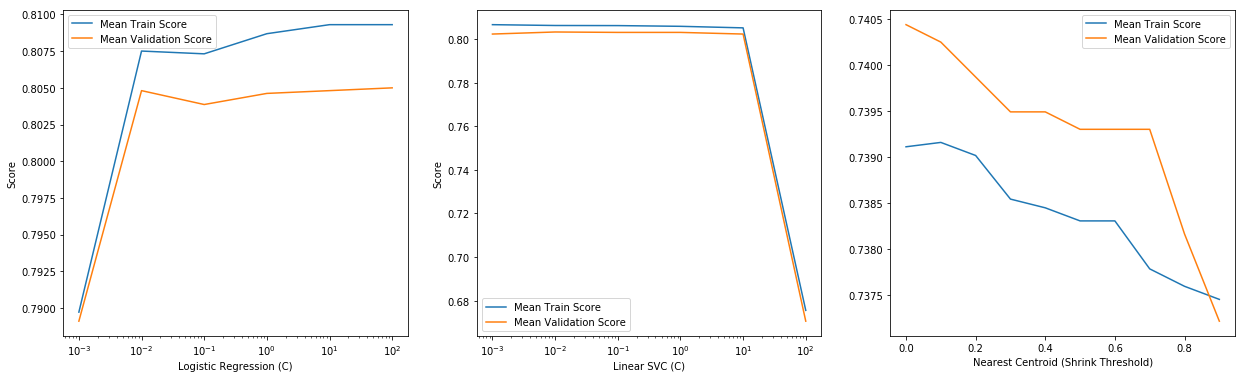

In [48]:
fig, ax = plt.subplots(1,3,figsize = (21,6))
logreg_result = pd.DataFrame(gcv_logreg.cv_results_)
ax[0].plot(logreg_result['param_logreg__C'], logreg_result['mean_train_score'], label = 'Mean Train Score')
ax[0].plot(logreg_result['param_logreg__C'], logreg_result['mean_test_score'], label = 'Mean Validation Score')
ax[0].set_xscale('log')
ax[0].legend(loc="best")
ax[0].set_xlabel('Logistic Regression (C)')
ax[0].set_ylabel('Score')

linearSVC_result = pd.DataFrame(gcv_linearSVC.cv_results_)
ax[1].plot(linearSVC_result['param_linearSVC__C'], linearSVC_result['mean_train_score'], label = 'Mean Train Score')
ax[1].plot(linearSVC_result['param_linearSVC__C'], linearSVC_result['mean_test_score'], label = 'Mean Validation Score')
ax[1].set_xscale('log')
ax[1].legend(loc="best")

ax[1].set_xlabel('Linear SVC (C)')
ax[1].set_ylabel('Score')

ncentroid_result = pd.DataFrame(gcv_ncentroid.cv_results_)
ax[2].plot(ncentroid_result['param_ncentroid__shrink_threshold'], ncentroid_result['mean_train_score'], label = 'Mean Train Score')
ax[2].plot(ncentroid_result['param_ncentroid__shrink_threshold'], ncentroid_result['mean_test_score'], label = 'Mean Validation Score')
ax[2].legend(loc="best")

ax[2].set_xlabel('Nearest Centroid (Shrink Threshold)')
ax[1].set_ylabel('Score')

# 2.4

In [53]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle = True)


paragrid_logreg = {'logreg__C':np.logspace(-3,2,6)}
#'logreg__penalty': ['l1', 'l2']
paragrid_linearSVC = {'linearSVC__C': np.logspace(-3, 2, 6)}
#'linearSVC__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]
paragrid_ncentroid = {'ncentroid__shrink_threshold': np.arange(0,1,0.1)}

gcv_logreg_kfold = GridSearchCV(pipeline_logreg, param_grid=paragrid_logreg, cv=kfold, return_train_score=True)
gcv_logreg_kfold.fit(X_train, y_train)
print("Logistic Regression best parameter with kfold is {}".format(gcv_logreg_kfold.best_params_))
print("Logistic Regression best score with kfold is {}".format(gcv_logreg_kfold.best_score_))


gcv_linearSVC_kfold = GridSearchCV(pipeline_linearSVC, param_grid=paragrid_linearSVC, cv=kfold, return_train_score=True)
gcv_linearSVC_kfold.fit(X_train, y_train)
print("Linear SVC best parameter with kfold is {}".format(gcv_linearSVC_kfold.best_params_))
print("Linear SVC best score with kfold is {}".format(gcv_linearSVC_kfold.best_score_))


gcv_ncentroid_kfold = GridSearchCV(pipeline_ncentroid, param_grid=paragrid_ncentroid, cv=kfold, return_train_score=True)
gcv_ncentroid_kfold.fit(X_train, y_train)
print("Nearest Centroid best parameter with kfold is {}".format(gcv_ncentroid_kfold.best_params_))
print("Nearest Centroid best score with kfold is {}".format(gcv_ncentroid_kfold.best_score_))



Logistic Regression best parameter with kfold is {'logreg__C': 10.0}
Logistic Regression best score with kfold is 0.8068913290420295
Linear SVC best parameter with kfold is {'linearSVC__C': 0.1}
Linear SVC best score with kfold is 0.8059447179098826
Nearest Centroid best parameter with kfold is {'ncentroid__shrink_threshold': 0.30000000000000004}
Nearest Centroid best score with kfold is 0.7387353275274517


* C parameter for logistic regression is constant from 100 to 10
* C parameter for linear SVC changed from 0.01 to 0.001
* C parameter for N Centroid changes from 0.0 to 0.4


In [51]:
kfold = KFold(n_splits=5, shuffle = True,random_state = 1)

gcv_logreg_kfold_seed= GridSearchCV(pipeline_logreg, param_grid=paragrid_logreg, cv=kfold, return_train_score=True)
gcv_logreg_kfold_seed.fit(X_train, y_train)
print("Logistic Regression best parameter with shuffle and seed is {}".format(gcv_logreg_kfold_seed.best_params_))
print("Logistic Regression best score with shuffle and seed is {}".format(gcv_logreg_kfold_seed.best_score_))


gcv_linearSVC_kfold_seed = GridSearchCV(pipeline_linearSVC, param_grid=paragrid_linearSVC, cv=kfold, return_train_score=True)
gcv_linearSVC_kfold_seed.fit(X_train, y_train)
print("Linear SVC best parameter with shuffle and seed is {}".format(gcv_linearSVC_kfold_seed.best_params_))
print("Linear SVC best score with shuffle and seed is {}".format(gcv_linearSVC_kfold_seed.best_score_))


gcv_ncentroid_kfold_seed = GridSearchCV(pipeline_ncentroid, param_grid=paragrid_ncentroid, cv=kfold, return_train_score=True)
gcv_ncentroid_kfold_seed.fit(X_train, y_train)
print("Nearest Centroid best parameter with shuffle and seed is {}".format(gcv_ncentroid_kfold_seed.best_params_))
print("Nearest Centroid best score with shuffle and seed is {}".format(gcv_ncentroid_kfold_seed.best_score_))

Logistic Regression best parameter with shuffle and seed is {'logreg__C': 0.01}
Logistic Regression best score with shuffle and seed is 0.8065126845891708
Linear SVC best parameter with shuffle and seed is {'linearSVC__C': 0.001}
Linear SVC best score with shuffle and seed is 0.8055660734570238
Nearest Centroid best parameter with shuffle and seed is {'ncentroid__shrink_threshold': 0.4}
Nearest Centroid best score with shuffle and seed is 0.7391139719803105


The below parameters change in comparison to 2.3 Stratified K-fold
* C parameter for logistic regression changed from 100 to 0.01
* C parameter for linear SVC changed from 0.01 to 0.001
* C parameter for N Centroid changed from 0 to 0.4

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split (telco_data.loc[:, telco_data.columns != 'Churn'],telco_data['Churn'], random_state = 10)
X1_train = pd.concat((X1_train[cat_var], X1_train[cont_var]), axis=1)


gcv_logreg_kfold_tt = GridSearchCV(pipeline_logreg, param_grid=paragrid_logreg, cv=kfold, return_train_score=True)
gcv_logreg_kfold_tt.fit(X1_train, y1_train)
print("Logistic Regression best parameter with kfold and train test seed change is {}".format(gcv_logreg_kfold_tt.best_params_))
print("Logistic Regression best score with kfold and train test seed change is {}".format(gcv_logreg_kfold_tt.best_score_))


gcv_linearSVC_kfold_tt = GridSearchCV(pipeline_linearSVC, param_grid=paragrid_linearSVC, cv=kfold, return_train_score=True)
gcv_linearSVC_kfold_tt.fit(X1_train, y1_train)
print("Linear SVC best parameter with kfold and train test seed change is {}".format(gcv_linearSVC_kfold_tt.best_params_))
print("Linear SVC best score with kfold and train test seed change is {}".format(gcv_linearSVC_kfold_tt.best_score_))


gcv_ncentroid_kfold_tt = GridSearchCV(pipeline_ncentroid, param_grid=paragrid_ncentroid, cv=kfold, return_train_score=True)
gcv_ncentroid_kfold_tt.fit(X1_train, y1_train)
print("Nearest Centroid best parameter with kfold and train test seed change is {}".format(gcv_ncentroid_kfold_tt.best_params_))
print("Nearest Centroid best score with kfold and train test seed change is {}".format(gcv_ncentroid_kfold_tt.best_score_))

Logistic Regression best parameter with kfold and train test seed change is {'logreg__C': 0.01}
Logistic Regression best score with kfold and train test seed change is 0.8051874290041651
Linear SVC best parameter with kfold and train test seed change is {'linearSVC__C': 0.1}
Linear SVC best score with kfold and train test seed change is 0.8042408178720182
Nearest Centroid best parameter with kfold and train test seed change is {'ncentroid__shrink_threshold': 0.0}
Nearest Centroid best score with kfold and train test seed change is 0.738356683074593


The below parameters change in comparison to 2.3 Stratified K-fold

* C parameter for logistic regression changed from 100 to 0.01
* C parameter for linear SVC changed from 0.01 to 0.001
* C parameter for N Centroid is constant from at 0.0

# 2.5

#Logistic Regression best score with kfold --> C = 1 and score = 0.8068
#Linear SVC best score also with kfold --> c = 10 and score = 0.8059

In [57]:
coeff_logreg = gcv_logreg_kfold.best_estimator_.named_steps['logreg'].coef_[0]
coeff_linearSVC = gcv_linearSVC_kfold.best_estimator_.named_steps['linearSVC'].coef_[0]

In [77]:
len(coeff_logreg)

46

Text(0.5, 0, 'Feature Position')

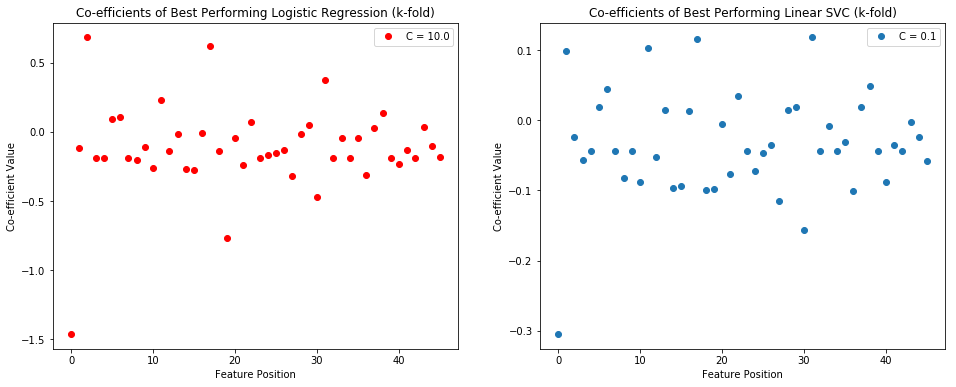

In [83]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
plt.subplots_adjust(wspace=0.2,hspace=0.60)

ax[0].plot(coeff_logreg, 'o', label = "C = 10.0", color = 'red')
ax[0].set_title ('Co-efficients of Best Performing Logistic Regression (k-fold)')
ax[0].set_ylabel ('Co-efficient Value')
ax[0].legend()
ax[0].set_xlabel ('Feature Position')



ax[1].plot(coeff_linearSVC, 'o', label = "C = 0.1")
ax[1].set_title ('Co-efficients of Best Performing Linear SVC (k-fold)')
ax[1].set_ylabel ('Co-efficient Value')
ax[1].legend()
ax[1].set_xlabel ('Feature Position')
